# 手書き文字の分類

MNISTのデータは、手書きで書かれた数字を画像にした画像データ(image)と、その画像に書かれた数字を表すラベルデータ(label)から構成されます。

![](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

In [6]:
from sklearn.datasets import fetch_openml
minist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame=FalseでDataFrame型ではなくndarray型で読み込む

c:\Users\zyrjs\新建文件夹\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


sklearn.datasetsを通じでMNISTをndarray型でデータが読み込まれます。
- ```data```キーは、インスタンスごと１行、特徴量ごとに1列という形の配列を格納する
- ```label``` キーは、ラベルの配列を格納する

In [7]:
print(minist.data.shape) # (70000, 784) 70000枚の画像データ、1枚あたり28×28=784の画素データ
print(minist.target.shape) # (70000,) 70000枚の画像データに対応するラベルデータ

(70000, 784)
(70000,)


つまり、70000個の画像データがあり、個々の画像には784個の特徴量があります。

各画像が$28 \times 28$ピクセルで、 個々の特徴量は$0$(白)から255(黒)までの値でピクセルの明度を表しています。

以下は、$0$番目のインスタンスの特徴量ベクトルを取り出して、$28 \times 28$配列の形に変換し、可視化すると、$5$のように見える数字が確認できます。

対応する$0$番目のラベルデータを確認すると、ラベルは$5$であることがわかりました。

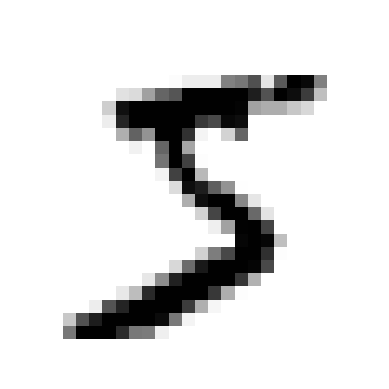

In [8]:
import matplotlib.pyplot as plt

some_digit = minist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [9]:
# 対応するラベルデータ
minist.target[0] # 5

'5'

MNISTデータを用いて、手書き数字を識別機械学習モデルを構築、評価しなさい。

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minist.data, minist.target, test_size=0.3, random_state=1)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)



Accuracy: 0.9778571428571429
